In [1]:
import json
import pandas as pd
import numpy as np
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
from pylab import rcParams
from lib import *

import seaborn as sns
rcParams['figure.figsize'] = (15.0, 10.0)
import itertools

from haversine import haversine
import time

cm = plt.cm.get_cmap('jet')

from sklearn.cluster import MiniBatchKMeans

# import plotly
# import plotly.plotly as py

# import plotly.graph_objs as go


# plotly.offline.init_notebook_mode() # run at the start of every notebook

In [2]:
def plot_line(x,y):
    data = [go.Scatter(x=x,y=y)]
    fig = go.Figure(data=data)
    plotly.offline.iplot(fig)

In [3]:

def trip_vals(keep,sa):
    keep_np = np.array(keep)
    w = keep_np[np.argmin(keep_np[:,0]),5]
    st = int(keep_np[np.argmin(keep_np[:,0]),6])

    opt = optimize(sa[st:].Weight.values,w)

    lens = keep_np[:(np.argmin(keep_np[:,0])+1),1:4].flatten()
    opt_lens = np.diff([-1]+list(np.where(np.diff(opt)>0)[0])+[len(opt)-1])
    all_len = np.hstack([lens,opt_lens])
    all_len
    return np.hstack([np.ones(i)*k for k,i in enumerate(all_len)])


trip_vals(keep,sa)


NameError: name 'keep' is not defined

In [ ]:
files = !ls sc2/

In [ ]:
params = [map(int,f.split('_')[1:4]) for f in files]

st = time.time()
out = []
for p in params:
    df = pd.read_csv('sc2/sc_{}_{}_{}_.csv'.format(*p))
    ww = np.arange(20,1000,2)
    sc = [optimize_and_score(df,w) for w in ww]
    min1 = ww[np.argmin(sc)]
    ww = np.arange(min1-4,min(min1+4,1000),.1)
    sc = [optimize_and_score(df,w) for w in ww]
    low_min = ww[np.argmin(sc)]
    low_score = min(sc)
    
    out += [p+[low_min,low_score]]
    print out[-1],(time.time()-st)


In [ ]:
out_df = pd.DataFrame(out,columns=['section','permutation','piece','w','score'])
out_df.to_csv("score_table_fast_opt2.csv",index=None)
scores = out_df.groupby(['section','permutation']).agg({'score':np.sum})
scores.groupby(level='section').agg({'score':np.argmin})
scores.groupby(level='section').agg({'score':np.min}).sum()

In [ ]:
out_df = pd.read_csv("score_table_fast_opt.csv")
scores = out_df.groupby(['section','permutation']).agg({'score':np.sum})
scores.groupby(level='section').agg({'score':np.argmin})
scores.groupby(level='section').agg({'score':np.min}).sum()

In [ ]:
slow_opt(2,2,0,970.5)

In [ ]:

perms = scores.groupby(level='section').agg({'score':np.argmin}).values
keep_p = []
for pp in perms:
    keep_p += [out_df[np.logical_and(out_df.section==pp[0][0],out_df.permutation==pp[0][1])].values]
    
keep_p = np.vstack(keep_p)
pd.DataFrame(keep_p[:,:4]).to_csv("files_to_optimize.txt",sep=' ',header=None,index=None)

In [ ]:
for kk in keep_p[:,:4]:
    print kk

In [ ]:
out_df.groupby(['section','permutation'])

In [ ]:
out_df

In [ ]:
.0008*50

In [ ]:
!ls keeper/

In [ ]:
pd.read_csv("keeper/k_8_2_0_.csv")

In [ ]:
files = !ls keeper/
params = [map(int,f.split('_')[1:4]) for f in files]

st = time.time()
out = []
k = 0
for p in params:
    df = pd.read_csv('keeper/k_{}_{}_{}_.csv'.format(*p))
    df.TripId += k
    k = max(df.TripId)+10
    k
    out.append(df)
#     break
k

In [ ]:
df = pd.concat(out)
sort_and_quick_ts(df)

In [ ]:
df.sort_values(["TripId","Latitude"],
        ascending=[1,0]).reset_index()[["TripId","GiftId"]].to_csv("sub_124845",index=None)

In [ ]:
def plot_sub_plotly(df2,col="score"):
    trace1 = go.Scattergl(
        x = df2.Longitude,
        y = df2.Latitude,
        mode='markers',
        text = df2[col],
        marker=dict(
            color = df2[col], #set color equal to a variable
            colorscale='Jet',
            showscale=True
        )
    )
    data = [trace1]
    plotly.offline.iplot(data)

In [ ]:
def plot_sub(s,vmin=0,vmax=0.02,trips = [],size_dot=1,eq=True):
#     print wrw(s)
    
    hash_id = np.array([abs(hash(str(stid+stid**2.4))) % (10 ** 8) for stid in s.TripId])
    cm = plt.cm.get_cmap('jet')
    plt.scatter(s.Longitude,s.Latitude,c=hash_id,cmap=cm,lw = 0,s=size_dot)
    if eq:
        plt.axis('equal')
    plt.show()

    plt.scatter(s.Longitude,s.Latitude,c=s.score,cmap=cm,lw = 0,s=size_dot,vmin=vmin,vmax=vmax)
    if eq:
        plt.axis('equal')
    plt.colorbar()
    plt.show()
    
    for k,t in enumerate(trips):
        plt.plot(s[s.TripId.between(t,t)].Longitude,
                s[s.TripId.between(t,t)].Latitude,'.-')
        plt.axis('equal')
        plt.show()

In [ ]:
df = import_submission("sub_124845")


In [ ]:
plot_sub(df)

In [ ]:
df2 = import_submission("submission_v10.csv")

In [ ]:
plot_sub(df2)

In [ ]:

df3 = df2.merge(df,on="GiftId")
df3["score"] = df3.score_x-df3.score_y
df3["TripId"] = df3.TripId_x-df3.TripId_y
df3["Latitude"] = df2.Latitude
df3["Longitude"] = df2.Longitude

In [ ]:
plot_sub(df3,vmax=.002,vmin=-.005)

In [ ]:

trace1 = go.Scattergl(
    x = df3.Longitude,
    y = df3.Latitude,
    text = df3.score,
    mode='markers',
    marker=dict(
        color = df3.score, #set color equal to a variable
        colorscale='Jet',
        showscale=True
    )
)

layout = go.Layout(
    autosize=False,
    width=500,
    height=1500
)
data = [trace1]
plotly.offline.iplot(data,layout)

In [2]:
df2 = import_submission("sub_opt5.csv")
df2_centers = df2.groupby("TripId").agg({"x":np.mean,"y":np.mean,"z":np.mean})
complex_pts = (df2_centers.x+df2_centers.y*1j).values
complex_pts = np.exp(1j*np.angle(complex_pts))
tids = df2_centers.index.values.astype(int)

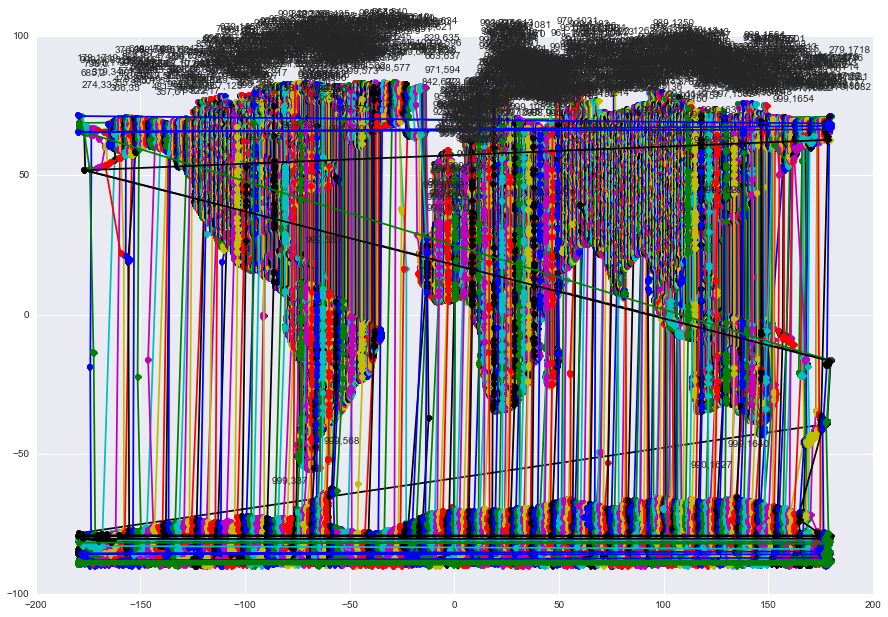

In [6]:
plot_trips(df2,range(3000));

In [8]:

num_sections = 20
rotate = round(np.pi/num_sections,2)
section_centers = np.arange(-np.pi,np.pi,2*np.pi/num_sections)+rotate
ep = 0
dist_from_center = (np.pi)/(num_sections+ep)
angle_ranges = np.array([[s-dist_from_center,s+dist_from_center] for s in section_centers])
angle_ranges = np.mod(angle_ranges,2*np.pi)
# print angle_ranges
angles = np.mod(np.angle(complex_pts),2*np.pi)
# plt.plot(angles)

out_inds = []
for x in angle_ranges:
    if x[0]<x[1]:
        out_inds.append(np.where(np.logical_and(angles>=x[0], angles<x[1]))[0])
    else:
        high_vals = np.where(np.logical_and(angles>=x[0], angles<=(2*np.pi)))[0]
        low_vals = np.where(np.logical_and(angles>=0, angles<=x[1]))[0]
        out_inds.append(np.hstack([high_vals,low_vals]))
                    
all_used = sum(map(len,out_inds))==len(complex_pts)
## verify non of the sets overlap
no_overlap = 0== sum([sum(set(s1).intersection(s2)) for s1,s2 in itertools.combinations(out_inds,2)])
print all_used,no_overlap
# np.savetxt('test.txt',np.array(out_inds),delimiter=',')


# with open('trip_segments_{}.txt'.format(rotate), 'w') as f:
#     for row in out_inds:
#         f.write(",".join(map(str, list(tids[row]))))
#         f.write("\n")
                

True True


In [10]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

rotate = 0.005
df = pd.DataFrame(np.vstack([tids,angles]).T,columns=["TripId","angle"]).sort_values("angle")
df.angle = np.mod(df.angle+rotate,2*np.pi)
df = df.sort_values("angle")
with open('trip_segments_{}.txt'.format(rotate), 'w') as f:
    k = 0
    for g, df_g in df.groupby(np.arange(len(df)) // 20):
        f.write(",".join(map(str, list(df_g.TripId.values.astype(int)))))
        f.write("\n")
        print(df_g.TripId.values)


[ 1329.  1328.  1138.  1137.  1327.  1326.  1325.  1324.  1323.  1135.
  1136.  1322.  1321.  1320.  1319.  1318.  1317.  1316.  1315.  1314.]
[ 1313.  1312.  1311.  1310.  1134.  1309.  1308.  1307.  1306.  1305.
  1304.  1303.  1302.  1301.  1300.  1299.  1298.  1133.  1297.  1296.]
[ 1295.  1294.  1132.  1293.  1292.  1291.  1131.  1290.  1289.  1288.
  1287.  1286.  1285.  1284.  1283.  1282.  1281.  1280.  1279.  1278.]
[ 1277.  1276.  1130.  1275.  1274.  1273.  1129.  1272.  1271.  1270.
  1128.  1269.  1268.  1267.  1266.  1265.  1264.  1263.  1262.  1261.]
[ 1260.  1259.  1258.  1127.  1257.  1256.  1255.  1126.  1254.  1253.
  1252.  1251.  1250.  1249.  1248.  1247.  1246.  1245.  1125.  1244.]
[ 1242.  1243.  1241.  1124.  1240.  1239.  1123.  1238.  1237.  1236.
  1122.  1235.  1234.  1233.  1232.  1231.  1230.  1229.  1228.  1225.]
[ 1227.  1226.  1121.  1224.  1223.  1120.  1222.  1119.  1221.  1220.
  1219.  1118.  1218.  1217.  1216.  1215.  1214.  1213.  1212.  1211.]

In [ ]:
ll = list(itertools.combinations(range(20),2))
len(ll)

In [ ]:
plt.plot(df2[df2.TripId.isin([0])].Longitude,df2[df2.TripId.isin([0])].Latitude,'r.-')
plt.plot(df2[df2.TripId.isin([1])].Longitude,df2[df2.TripId.isin([1])].Latitude,'b.-')

In [ ]:
plt.plot(r0[:,0])
plt.plot(t1[:,0],'r.')
plt.ylim([-90,-70])

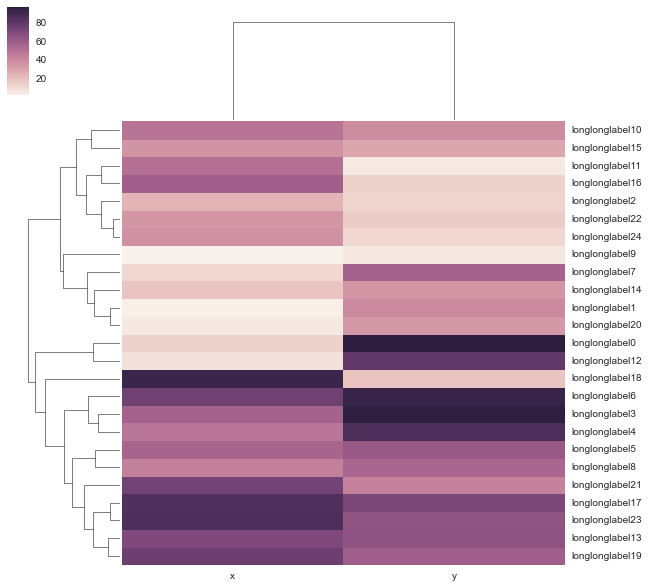

In [11]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame()

df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

L = []
for i in range(25):
    L.append('longlonglabel' + str(i))

df.index = L
sns.clustermap(df)
plt.show()

In [13]:
nhours = 365*24
time_series = pd.Series(range(nhours), index=pd.date_range('2013-1-1', periods=nhours, freq='H'))

In [17]:
time_series[time_series.index.isin(['2013-01-01 11:00:00',
'2013-01-01 00:00:00',
'2013-12-30 18:00:00'])].values

array([   0,   11, 8730])